### Author:- Abhishek Kumar
### Project:- Black Friday Analysis Project

## Black Friday Dataset EDA And Feature Engineering
### Cleaning and preparing the data for model training

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Step 1:- Import all the important Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2:- Now Read the CSV file from the black friday dataset

In [2]:
df_train=pd.read_csv("black friday train data.csv")

In [3]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Step 3:- Now import test data from the dataset:-

In [5]:
df_test=pd.read_csv("black friday test data.csv")

In [6]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [7]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


### Step 4:- Now We merge both Train and test data:-

In [17]:
import pandas as pd

# Assuming df_train and df_test are already defined DataFrames
df = pd.concat([df_train, df_test])
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     771176 non-null  int64  
 1   Product_ID                  771176 non-null  object 
 2   Gender                      771176 non-null  object 
 3   Age                         771176 non-null  object 
 4   Occupation                  771176 non-null  int64  
 5   City_Category               771176 non-null  object 
 6   Stay_In_Current_City_Years  771176 non-null  object 
 7   Marital_Status              771176 non-null  int64  
 8   Product_Category_1          771176 non-null  int64  
 9   Product_Category_2          531846 non-null  float64
 10  Product_Category_3          235315 non-null  float64
 11  Purchase                    537577 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 76.5+ MB


In [20]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.711760e+05,771176.000000,771176.000000,771176.000000,531846.000000,235315.000000,537577.000000
mean,1.003003e+06,8.083527,0.409183,5.289790,9.844400,12.669724,9333.859853
std,1.718156e+03,6.523215,0.491683,3.746377,5.089586,4.124816,4981.022133
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001501e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003042e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004438e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [35]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
if 'User_ID' in df.columns:
    df.drop(['User_ID'], axis=1, inplace=True)
else:
    print("'User_ID' column not found in DataFrame.")


'User_ID' column not found in DataFrame.


In [37]:
df.columns = df.columns.str.strip()

In [38]:
df.drop(['User_ID'], axis=1, inplace=True, errors='ignore')


In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [40]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            239330
Product_Category_3            535861
Purchase                      233599
dtype: int64

In [44]:
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
233594,False
233595,False
233596,False
233597,False


In [49]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [50]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0,1


In [51]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [52]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [56]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,1


In [58]:
pd.get_dummies(df['Age'],drop_first=True)

,2,3,4,5,6,7
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
233594,False,True,False,False,False,False
233595,False,True,False,False,False,False
233596,False,True,False,False,False,False
233597,False,False,False,True,False,False


In [59]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [60]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,1


In [61]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [63]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [64]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,1,False,True


In [65]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [66]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,1,False,True


In [67]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            239330
Product_Category_3            535861
Purchase                      233599
gender                             0
B                                  0
C                                  0
dtype: int64

In [68]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [69]:
## Focus on replacing missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [70]:
## Focus on replacing missing values
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ..., 11120., 18426.,    nan])

In [73]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     90287
14.0    77884
2.0     69762
16.0    61034
15.0    53576
5.0     36804
4.0     36253
6.0     23360
11.0    20041
17.0    18914
13.0    14892
9.0      8075
12.0     7692
10.0     4368
3.0      4074
18.0     3987
7.0       843
Name: count, dtype: int64

In [74]:
df['Product_Category_2'].mode()[0]

8.0

In [75]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [76]:
df['Product_Category_2'].isnull().sum()

0

In [77]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [79]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    45981
15.0    39566
14.0    25976
17.0    23565
5.0     23521
8.0     17683
9.0     16367
12.0    12963
13.0     7775
6.0      6816
18.0     6555
4.0      2656
11.0     2553
10.0     2473
3.0       865
Name: count, dtype: int64

In [82]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [81]:
df['Product_Category_3'].isnull().sum()

0

In [83]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,False,False
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,1,False,True


In [84]:
df.shape

(771176, 13)

In [85]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [86]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,False,False
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,False,False
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,False,False
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,1,False,True


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  771176 non-null  object 
 1   Gender                      771176 non-null  int64  
 2   Age                         771176 non-null  int64  
 3   Occupation                  771176 non-null  int64  
 4   Stay_In_Current_City_Years  771176 non-null  object 
 5   Marital_Status              771176 non-null  int64  
 6   Product_Category_1          771176 non-null  int64  
 7   Product_Category_2          771176 non-null  float64
 8   Product_Category_3          771176 non-null  float64
 9   Purchase                    537577 non-null  float64
 10  gender                      771176 non-null  int64  
 11  B                           771176 non-null  bool   
 12  C                           771176 non-null  bool   
dtypes: bool(2), float64

In [90]:
print(df['Stay_In_Current_City_Years'].unique())

['2' '4+' '3' '1' '0']


In [127]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'].str.replace('+', '', regex=False), errors='coerce')
# Optionally, you can fill NaNs or drop rows with NaNs if necessary
df['Stay_In_Current_City_Years'].fillna(0, inplace=True)  # Example: replace NaNs with 0
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int


SyntaxError: incomplete input (3233926749.py, line 4)

In [93]:
print(df['Stay_In_Current_City_Years'].dtype)
print(df['Stay_In_Current_City_Years'].head())

int32
0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: int32


In [94]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  771176 non-null  object 
 1   Gender                      771176 non-null  int64  
 2   Age                         771176 non-null  int64  
 3   Occupation                  771176 non-null  int64  
 4   Stay_In_Current_City_Years  771176 non-null  int32  
 5   Marital_Status              771176 non-null  int64  
 6   Product_Category_1          771176 non-null  int64  
 7   Product_Category_2          771176 non-null  float64
 8   Product_Category_3          771176 non-null  float64
 9   Purchase                    537577 non-null  float64
 10  gender                      771176 non-null  int64  
 11  B                           771176 non-null  bool   
 12  C                           771176 non-null  bool   
dtypes: bool(2), float64

In [95]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 771176 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  771176 non-null  object 
 1   Gender                      771176 non-null  int64  
 2   Age                         771176 non-null  int64  
 3   Occupation                  771176 non-null  int64  
 4   Stay_In_Current_City_Years  771176 non-null  int32  
 5   Marital_Status              771176 non-null  int64  
 6   Product_Category_1          771176 non-null  int64  
 7   Product_Category_2          771176 non-null  float64
 8   Product_Category_3          771176 non-null  float64
 9   Purchase                    537577 non-null  float64
 10  gender                      771176 non-null  int64  
 11  B                           771176 non-null  int32  
 12  C                           771176 non-null  int32  
dtypes: float64(3), int3

AttributeError: 'numpy.int64' object has no attribute 'startswith'

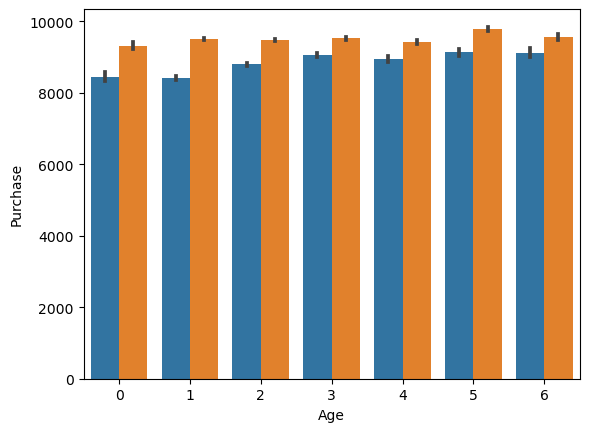

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

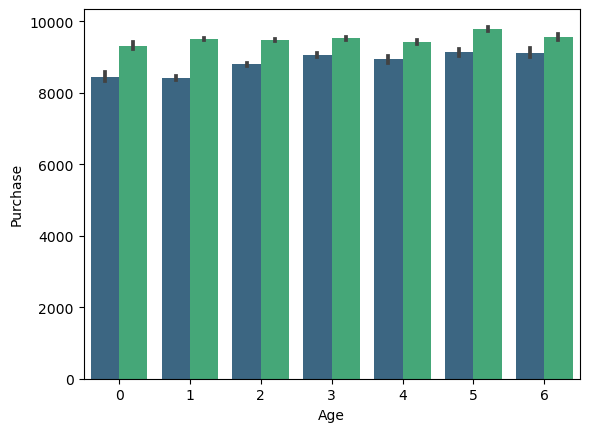

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, palette='viridis')

# Add titles and labels
plt.title('Purchase Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')

# Show the plot
plt.show()

## Purchasing of men is high then women

In [101]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

TypeError: barplot() got multiple values for argument 'data'

AttributeError: 'numpy.int64' object has no attribute 'startswith'

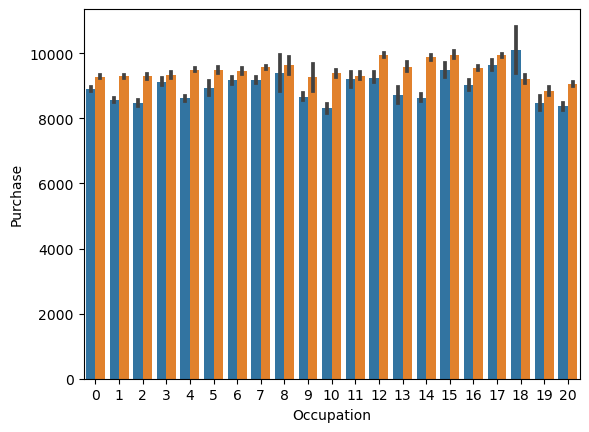

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

In [103]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)


TypeError: barplot() got multiple values for argument 'data'

AttributeError: 'numpy.int64' object has no attribute 'startswith'

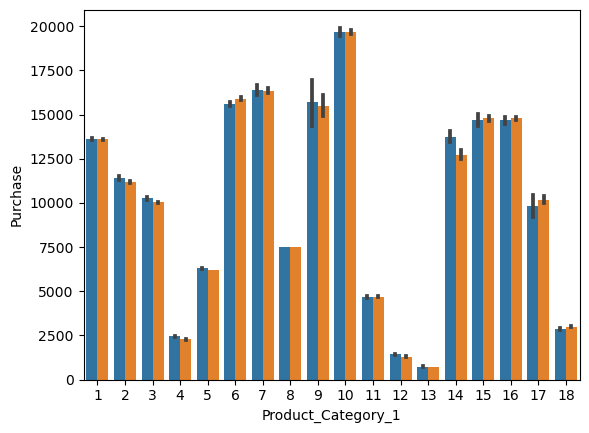

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

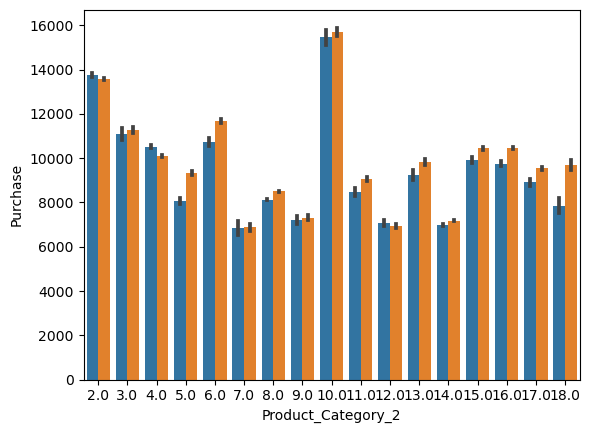

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

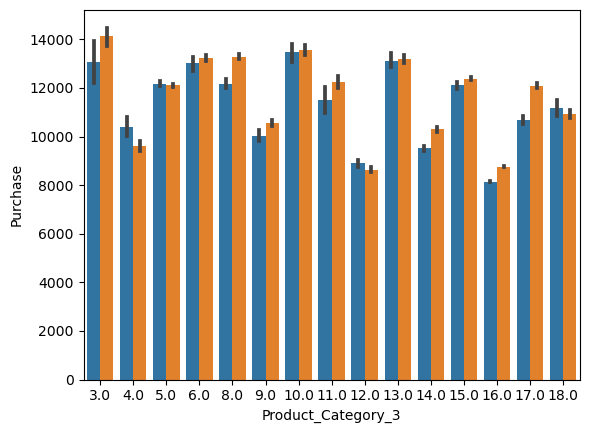

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

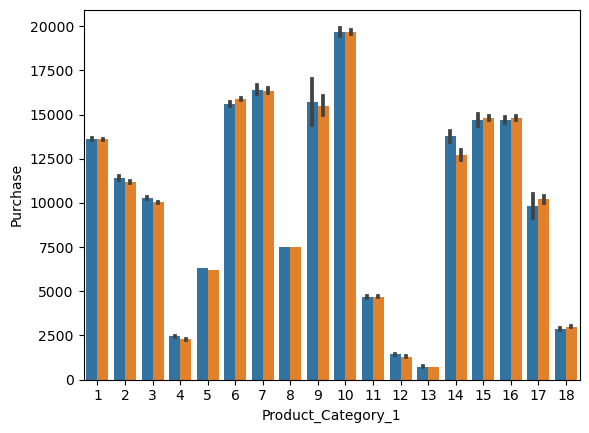

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

# Display the plot
plt.show()

In [106]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,1,0,1


In [112]:
df_test=df[df['Purchase'].isnull()]

In [113]:
df_train=df[~df['Purchase'].isnull()]

In [114]:
X=df_train.drop('Purchase',axis=1)

In [116]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,gender,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,1,0,1


In [119]:
X.shape

(537577, 12)

In [120]:
y=df_train['Purchase']

In [121]:
y.shape

(537577,)

In [122]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
537572    11664.0
537573    19196.0
537574     8043.0
537575     7172.0
537576     6875.0
Name: Purchase, Length: 537577, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [124]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [126]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)